In [37]:
import numpy as np
from numpy import newaxis, r_, c_, mat
import pandas as pd
import matplotlib.pyplot as plt

### Linear regression with one variable

In this part of this exercise, we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. 

The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next. 

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [24]:
data = pd.read_csv('data/ex1data1.txt', header = None) #read from dataset
data.head(5)

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.size

194

#### 2.1 Plotting the Data :

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data.

Since it has only two properties to plot (profit and population). 

Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.

In [25]:
X = data.iloc[:,0] # read first column
y = data.iloc[:,1]#read second column

m = len(y); #number of training examples
print(m)

97


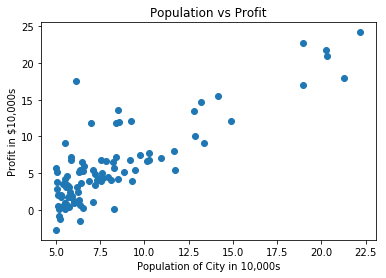

In [26]:
#Plot data
#create trace
plt.scatter(X,y)
plt.title('Population vs Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

#### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters θ to our dataset
using gradient descent.

The objective of linear regression is to minimize the cost function

##### 2.2.1 Update Equations

J ($\theta$) = $\sum_{i = 1}^{\infty}$ $((h_\theta$($x^i$) - $y^i$))^2$

where the hypothesis hθ(x) is given by the linear model
hθ(x) = θ
T x = θ0 + θ1x


Recall that the parameters of your model are the θj values. These are
the values you will adjust to minimize cost J(θ). One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

θj := θj − α * (1/m) 
$\sum_{i = 1}^{\infty}$ $((h_\theta$($x^i$) - $y^i$))^X{j}^i$
(simultaneously update θj for all j).

With each step of gradient descent, your parameters θj come closer to the
optimal values that will achieve the lowest cost J(θ).

##### 2.2.2 Implementation

In ex1.m, we have already set up the data for linear regression. In the
following lines, 

We add another dimension to our data to accommodate the
θ0 intercept term. We also initialize the initial parameters to 0 and the
learning rate alpha to 0.01.

In [27]:
X = X[:,np.newaxis] #newaxis converts into vector. for ex. it converts x = np.array([-1,2]) to np.array([[-1],[2]])
y = y[:,np.newaxis]

# adding the intercept term
ones = np.ones((m,1)) 
X = np.hstack((ones, X)) #Add a column of ones to x.

#### 2.2.3 Computing the cost J(θ)

As you perform gradient descent to learn minimize the cost function J(θ), it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate J(θ) so you can check the convergence of your gradient descent implementation.

First of all lets calculate Cost.
remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set. Once you have completed the function, the next step is to run computeCost once using θ initialized to zeros, and you will see the cost printed to the screen.

You should expect to see a cost of 32.07

In [28]:
#Testing the cost function
def computeCost(X,y,theta):
    J = (np.sum(np.power((np.dot(X, theta) - y),2)))/(2*m)
    return J

In [29]:
#compute and display initial cost
theta = np.zeros((2,1))
J = computeCost(X, y, theta)
print('compute and display initial cost: ',J)

compute and display initial cost:  32.0727338775


In [30]:
#further testing of the cost function
theta = np.array([-1,2])
theta = theta[:,np.newaxis]  #this is similar to theta = np.array([[-1],[2]])
J = computeCost(X, y, theta);
print('further testing of the cost function: ',J)

further testing of the cost function:  54.242455082


#### 2.2.4 Gradient descent

Next implement calculate gradiantDecent. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost J(θ) is parameterized by the vector θ, not X and y. That is, we minimize the value of J(θ) by changing the values of the vector θ, not by changing X or y. Refer to the equations in this handout and to the video lectures if you are uncertain.
A good way to verify that gradient descent is working correctly is to look at the value of J(θ) and check that it is decreasing with each step.

Assuming you have implemented gradient descent and computeCost correctly, your value of J(θ) should never increase, and should converge to a steady value by the end of the algorithm.

In [31]:
def gradientDescent(X,y,theta,alpha,iterations):
    m = y.size
    J_history = np.zeros(iterations)
    
    for iter in np.arange(iterations):
        h = X.dot(theta)
        theta = theta - alpha * (1/m) * (X.T.dot(h-y))
        J_history[iter] = computeCost(X,y,theta)
    return(theta, J_history)


Running Gradient Descent ...

theta: [-3.70968912  1.17433871]


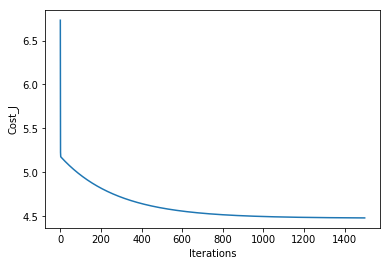

In [32]:
print('\nRunning Gradient Descent ...\n')
#Some gradient descent settings
iterations = 1500
alpha = 0.01

theta, Cost_J = gradientDescent(X, y, theta, alpha, iterations)
print('theta:', theta.ravel())

plt.plot(Cost_J)
plt.xlabel('Iterations')
plt.ylabel('Cost_J')
plt.show()

Now compute costfunction with optimized value of theta

In [33]:
J = computeCost(X, y, theta);
print('cost function with optimized value of theta: ',J)

cost function with optimized value of theta:  4.48012408393


New cost function value is 4.48.. which is much better then 32.07

use these final parameters to plot the linear fit. 

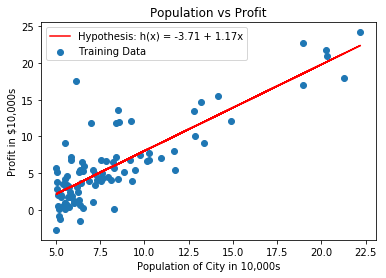

In [34]:
plt.scatter(X[:,1],y, label = 'Training Data')
plt.title('Population vs Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], X.dot(theta),color='red',label='Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.legend(loc='best')
plt.show()

Predict profit for a city with population of 35000 and 70000
hypothesis equation 
hθ

In [35]:
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[ 4004.9636045]
[ 45106.81840164]


Visualizing J(theta_0, theta_1) ...



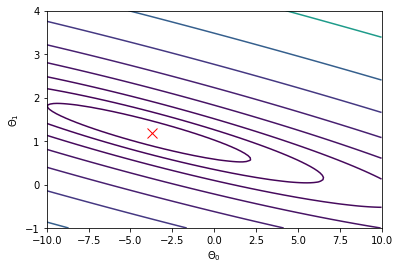

In [38]:
print('Visualizing J(theta_0, theta_1) ...\n')

from mpl_toolkits.mplot3d import axes3d

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out j_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = r_[theta0_vals[i], theta1_vals[j]][:, newaxis]
        J_vals[i, j] = computeCost(X, y, t)

J_vals = J_vals.T
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=5) #you can pass different theta values to visualize J(theta_0, theta_1)
plt.xlabel(r'$\Theta_0$'); plt.ylabel(r'$\Theta_1$')
plt.show()

### 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [14]:
print('Loading data ...\n');

# Load Data
data2 = pd.read_csv('data/ex1data2.txt', header = None) #read from dataset
data2.head(5)

Loading data ...



,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [15]:
X = data2.iloc[:, 0:2]
y = data2.iloc[:, 2]
m = len(y)
#print(X.head(), y.head(),m)

#### 3.1 Feature Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Our task here is to:
*Subtract the mean value of each feature from the dataset.
*After subtracting the mean, 

additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min).

In [16]:
X = (X-np.mean(X))/np.std(X)

In [17]:
ones = np.ones((m,1))
X = np.hstack((ones,X))
theta = np.zeros((3,1))
y = y[:,np.newaxis]

In [18]:
#Testing the cost function
def computeCostMulti(X,y,theta):
    J = (np.sum(np.power((np.dot(X, theta) - y),2)))/(2*m)
    return J

In [19]:
J = computeCostMulti(X, y, theta)
print(J)

65591548106.5


### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. 

The only difference now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.

for equations, use lecture notes or video for reference.

In [42]:
print('Running gradient descent ...\n');

# Choose some alpha value
alpha = 0.01;
num_iters = 400;

def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)
    for iter in range(iterations):
        theta = theta - (alpha/m) * np.dot(X.T, (np.dot(X,theta) - y))
        J_history[iter] = computeCostMulti(X, y, theta)
    return (theta, J_history)  

Running gradient descent ...



theta: [-3.80535315  1.1839492 ]


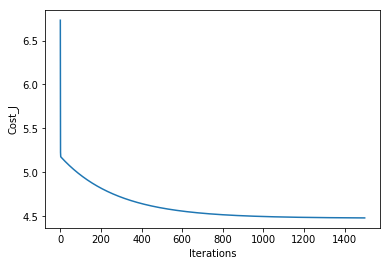

In [43]:
theta, cost_J = gradientDescentMulti(X, y, theta, alpha, num_iters)
print('theta:', theta.ravel())

plt.plot(Cost_J)
plt.xlabel('Iterations')
plt.ylabel('Cost_J')
plt.show()

In [44]:
J = computeCostMulti(X, y, theta)
print(J)

4.47771582104


#### 3.3 Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression. please refer lecture notes for the equation.

Using normal equation formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent

In [45]:
#Estimate the price of a 1650 sq-ft, 3 br house
from numpy.linalg import inv

def normEqtn(X,y):
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

In [46]:
h = np.dot(X, theta)

In [47]:
print ("Predicted price of a 1650 sq-ft, 3 br house (using normal equations)")
print ("$%0.2f" % float(h(normEqtn(X,y),[1,1650.,3])))

Predicted price of a 1650 sq-ft, 3 br house (using normal equations)


TypeError: 'numpy.ndarray' object is not callable